In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt


In [2]:
variants = [
    "no_trans",
    "official",
    "train_subset",
    "train_no_shed",
    # "train_drop",
    # "train_drop_no_shed",
    # "train_no_head",
    # "train_drop_no_aug",
    # "train_no_wd"
    "vot_subset",
    "vot_no_shed"
]
data = {}
for v in variants:
    with open("output/"+v + ".p", "rb") as handle:
        b = pickle.load(handle)
    data[v] = b


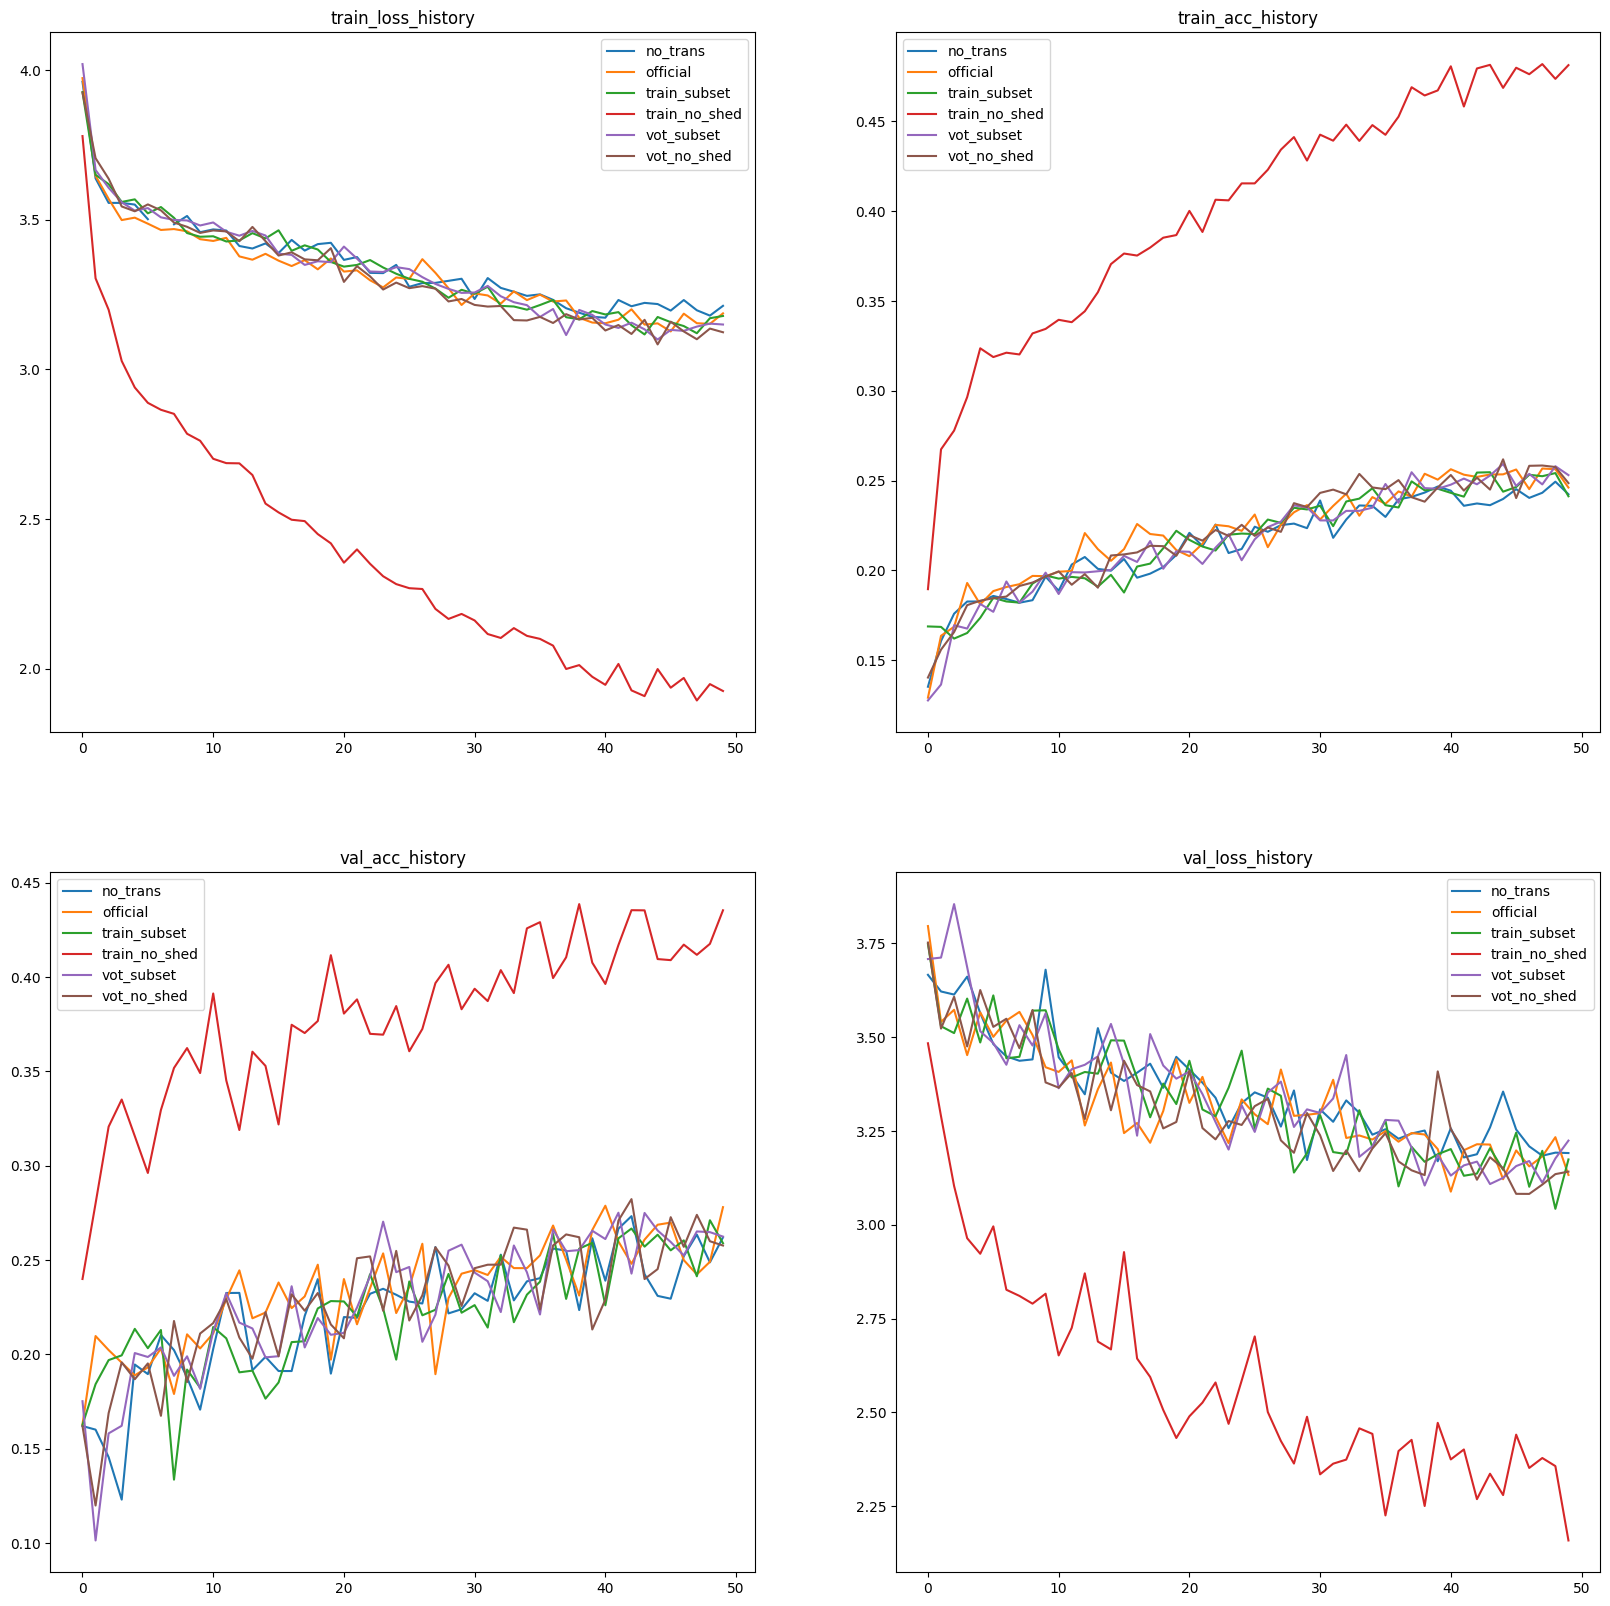

In [3]:
keys = list(list(data.values())[0].keys())
y = np.arange(50)
fig, axes = plt.subplots(2, 2, figsize=(20, 20))

for i, name in enumerate(keys):
    ax = axes.flatten()[i]
    for k, v in data.items():
        ax.plot(y, v[name], label=k)
    ax.legend()
    ax.set_title(name)


In [4]:
val_acc = np.array([v["val_acc_history"][-1] for v in data.values()])
backbone_var = np.array([.0018, .0065, 2.875, .0082, 4.5633, .0094, 15.7839, .0101])

ValueError: x and y must be the same size

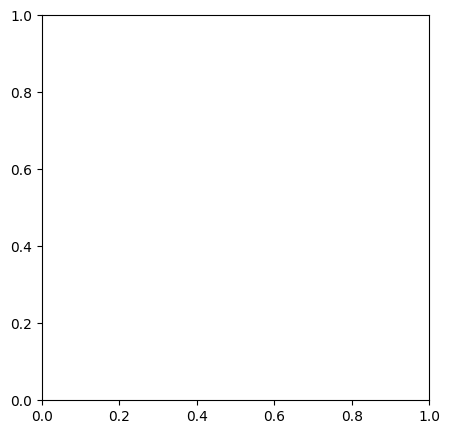

In [5]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(backbone_var, val_acc[1:])
ax.set_xlabel("backbone var")
ax.set_ylabel("segm acc")
ax.set_xscale('log')